# Assingment 1

**Group5** Member | MatriculationNr |
:-|:-:|
Longtao Liu|03738240|

## Task 1.1

Let $$ C_{d} = \{x \in \mathbb{R}^{p} | || x ||_{\infty} < d/2\}$$
denote the p-dimensional hypercube of edge length d, centered at the origin.

Assume X to be uniformly distributed in C1. Determine d in dependence of p
and $ q \in [0, 1]$ such that
$Pr(X \in C_{d}) = q$
holds.

### Solution

The volume equation for $C_{d}$, the p-dimensional hypercube of edge length d is $$ V_{Cd} = d^{p} $$
Therefore $C_{1}$'s volume is $$ V_{C1} = 1^{p} = 1 $$
Now the probability of $Pr(X \in C_{d})$ can be discussed with 2 different situatio depending on d.

When $d>=1$, $ C_{1}$ is inside $C_{d}$ and X is uniformly distributed completely inside $ C_{d}$ , hence: $$Pr(X \in C_{d}) = q = 1$$ 
Then d is independent of p and q and >= 1.

When $d<1$, $ C_{d}$ is inside $C_{1}$ and X is uniformly distributed inside and outside $ C_{d}$ , hence: $$Pr(X \in C_{d}) = q = \frac{V_{Cd}}{V_{C1}}$$ 
$$ q = \frac{d^{p}}{1} = d^{p} $$
Hence we get
$$ d = \sqrt[p]{q}$$



## Task 1.2

Let the components of the p-dimensional random variable Xp be independent and
have the standard normal distribution. It is known that $Pr(|X^{1}| <=  2.576) = 0.99$.

For an arbitrary p, determine the probability $Pr(|| X^{p} ||_{\infty} > 2.576)$ for any of the
components of $X^{p} $ to lie outside of the interval $[-2.576, 2.576]$. Evaluate the value
for p = 2, p = 3 and p = 500.

### Solution

$$Pr(|| X^{p} ||_{\infty} > 2.576) =  1 - Pr(|| X^{p} ||_{\infty} <= 2.576)$$

Since components of $X^{p}$ are independent.
$$Pr(|| X^{p} ||_{\infty} <= 2.576) = Pr(|X^{1}| <=  2.576)^{p} = (0.99)^{p} $$

Therefore,
$$Pr(|| X^{p} ||_{\infty} > 2.576) =  1 - Pr(|| X^{p} ||_{\infty} <= 2.576) = 1 - (0.99)^p$$

When p = 2, $Pr(|| X^{2} ||_{\infty} > 2.576) = 1 - (0.99)^2 = 0.0199$

When p = 3, $Pr(|| X^{3} ||_{\infty} > 2.576) = 1 - (0.99)^3 = 0.0297$

When p = 500, $Pr(|| X^{500} ||_{\infty} > 2.576) = 1 - (0.99)^500 = 0.9934$

## Task 2.1

Sample 100 uniformly distributed random vectors from the box $[-1, 1]^{d}$ for d = 2.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def sample(n,d):
    '''return n uniformly distributed random vectors from the box [−1,1]^d '''
    return np.random.random((n, d)) * 2 - 1

d = 2      # dimensions
n = 100    # samples

x = sample(n, d)

## Task 2.2

For each of the 100 vectors determine the minimum angle to all other vectors.
Then compute the average of these minimum angles.

In [3]:
def angle_between(v1,v2):
    '''return angle between 2 vectors, i.e. arccos(<x, y>/(|x|*|y|))'''
    
    #unit vector
    v1_u = v1 / np.linalg.norm(v1)
    v2_u = v2 / np.linalg.norm(v2)
    
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [4]:
def avg_min_angle(x):
    '''return average of the minimum angle between each vector and all other vectors'''
    
    n, d = x.shape
    min_angles = np.zeros(n)
    
    #find min angle for eavh vector in x
    for i, v1 in enumerate(x):
        min_angle = 2*(np.pi) #max possible angle
        for j, v2 in enumerate(x):
            if (j != i): #avoid angle with itself
                angle = angle_between(v1,v2)
                if (angle < min_angle):
                    min_angle = angle
        min_angles[i] =  min_angle
    
    #return avg
    return np.average(min_angles)
        

In [10]:
print("Average of the minimum angle for each vector in X is " + str(avg_min_angle(x)))

Average of the minimum angle for each vector in X is 0.031075912874770052


## Task 2.3

Repeat the above for dimensions d = 1 to 1000 and use the results to plot the average minimum angle against the dimension.

In [6]:
def plot_minang_dim(d_list,n):
    '''plot average minimum angle against the dimension for different d'''
    
    #compute average min angle list for each d
    min_angles = np.zeros(d_list.shape[0])
    for i, d in enumerate(d_list):
        min_angles[i] = avg_min_angle(sample(n, d))
    
    #plot
    plt.plot(d_list, min_angles)
    plt.xlabel('Dimension d')
    plt.ylabel('Average Minimum Angle')
    plt.title('Average Minimum Angle against Dimension')
    plt.grid()

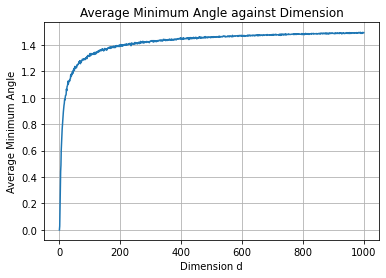

In [7]:
d_list = np.arange(1, 1001) # d = 1 to 1000
n = 100
plot_minang_dim(d_list,n)